Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('transactions.csv')

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df.columns)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(k, random_state=42)  # Set random_state for reproducibility

def exercise_4(df):
    return df['type'].unique().tolist()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    return df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False).reset_index(name='distinct_destinations')

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [21]:
df = exercise_0('transactions.csv')

In [22]:
# Test exercises here
print("Dataset shape:", df.shape)
print("\nColumn names:", exercise_1(df))
print("\nFirst 5 rows:\n", exercise_2(df, 5))
print("\n5 random samples:\n", exercise_3(df, 5))
print("\nUnique transaction types:", exercise_4(df))
print("\nTop 10 transaction destinations:\n", exercise_5(df))
print("\nNumber of fraudulent transactions:", len(exercise_6(df)))
print("\nTop 10 sources by number of distinct destinations:\n", exercise_7(df).head(10))

Dataset shape: (200000, 11)

Column names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             

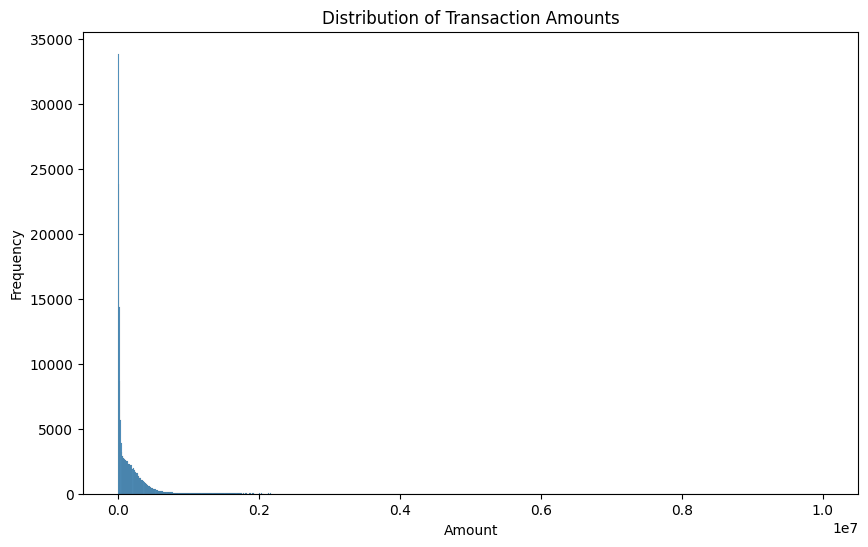

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'These charts show the distribution of transaction types and their relationship to fraudulent activities, helping identify which types are more prone to fraud.'

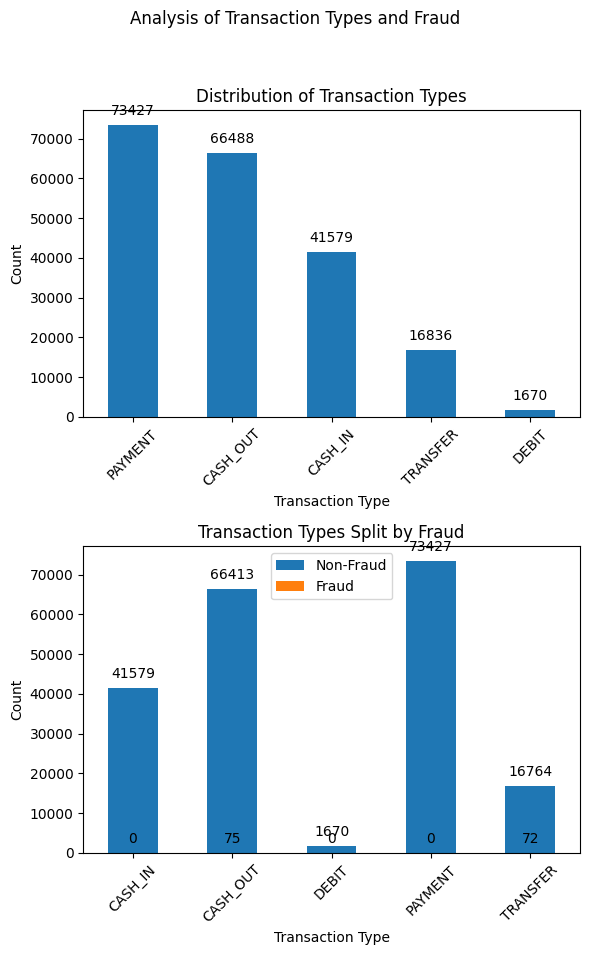

In [23]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        return df.groupby(['type', 'isFraud']).size().unstack()

    fig, axs = plt.subplots(2, figsize=(6,10))
    
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Distribution of Transaction Types')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Count')
    axs[0].tick_params(axis='x', rotation=45)

    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar', stacked=True)
    axs[1].set_title('Transaction Types Split by Fraud')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].legend(['Non-Fraud', 'Fraud'])

    fig.suptitle('Analysis of Transaction Types and Fraud')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    for ax in axs:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    return 'These charts show the distribution of transaction types and their relationship to fraudulent activities, helping identify which types are more prone to fraud.'

visual_1(df)

'This scatter plot visualizes the relationship between origin and destination balance changes in Cash Out transactions, highlighting potential fraudulent patterns.'

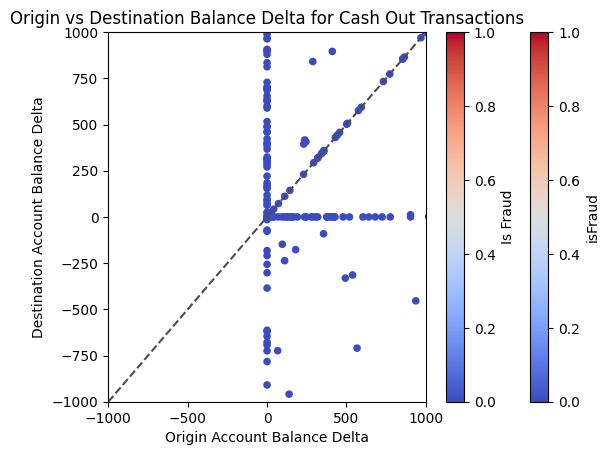

In [24]:
def visual_2(df):
    def query(df):
        cash_out = df[df['type'] == 'CASH_OUT'].copy()
        cash_out['origin_balance_delta'] = cash_out['oldbalanceOrg'] - cash_out['newbalanceOrig']
        cash_out['dest_balance_delta'] = cash_out['newbalanceDest'] - cash_out['oldbalanceDest']
        return cash_out

    plot = query(df).plot.scatter(x='origin_balance_delta', y='dest_balance_delta', c='isFraud', cmap='coolwarm')
    plot.set_title('Origin vs Destination Balance Delta for Cash Out Transactions')
    plot.set_xlabel('Origin Account Balance Delta')
    plot.set_ylabel('Destination Account Balance Delta')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)

    # Add color bar
    plt.colorbar(plot.collections[0], label='Is Fraud')

    # Add diagonal line
    plt.plot([-1e3, 1e3], [-1e3, 1e3], ls="--", c=".3")

    return 'This scatter plot visualizes the relationship between origin and destination balance changes in Cash Out transactions, highlighting potential fraudulent patterns.'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

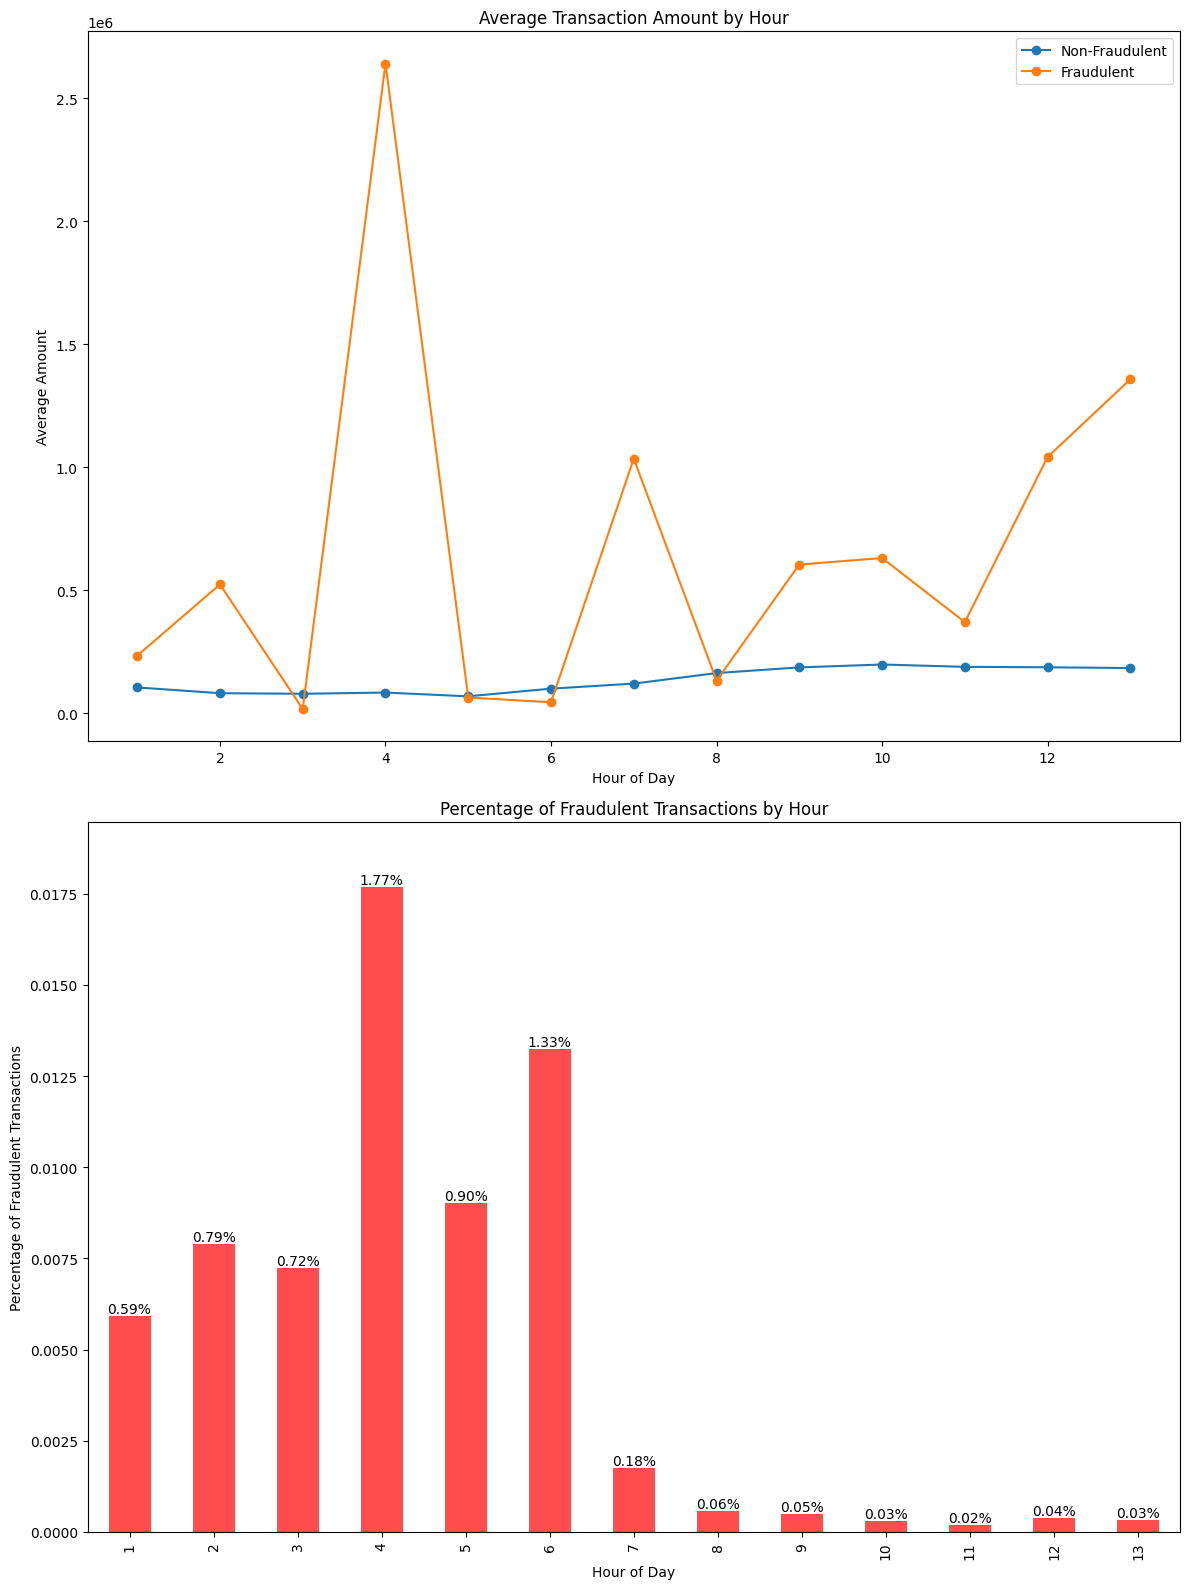

This visualization explores the relationship between transaction amounts, fraudulent activity, and time of day. The top graph shows the average transaction amounts for both fraudulent and non-fraudulent transactions across different hours of the day. The bottom graph displays the percentage of transactions that are fraudulent for each hour. This analysis can help identify time-based patterns in fraudulent activity and unusual transaction amounts.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def exercise_custom(df):
    # Convert 'step' to datetime and extract hour
    df['hour'] = df['step'] % 24
    
    # Group by hour and fraud status, calculate mean amount
    hourly_amounts = df.groupby(['hour', 'isFraud'])['amount'].mean().unstack()
    
    # Calculate the percentage of fraudulent transactions per hour
    fraud_counts = df.groupby('hour')['isFraud'].value_counts(normalize=True).unstack()[1]
    
    return hourly_amounts, fraud_counts

def visual_custom(df):
    hourly_amounts, fraud_counts = exercise_custom(df)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
    
    # Plot average transaction amounts
    hourly_amounts.plot(ax=ax1, marker='o')
    ax1.set_title('Average Transaction Amount by Hour')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Average Amount')
    ax1.legend(['Non-Fraudulent', 'Fraudulent'])
    
    # Plot percentage of fraudulent transactions
    fraud_counts.plot(ax=ax2, kind='bar', color='red', alpha=0.7)
    ax2.set_title('Percentage of Fraudulent Transactions by Hour')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Percentage of Fraudulent Transactions')
    ax2.set_ylim(0, fraud_counts.max() * 1.1)  # Set y-axis limit to slightly above max value
    
    # Add percentage labels on top of each bar
    for i, v in enumerate(fraud_counts):
        ax2.text(i, v, f'{v:.2%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return ("This visualization explores the relationship between transaction amounts, fraudulent activity, and time of day. "
            "The top graph shows the average transaction amounts for both fraudulent and non-fraudulent transactions across different hours of the day. "
            "The bottom graph displays the percentage of transactions that are fraudulent for each hour. "
            "This analysis can help identify time-based patterns in fraudulent activity and unusual transaction amounts.")

# Run the custom visualization
description = visual_custom(df)
print(description)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.